In [1]:
import skimage
import cv2
import numpy as np

from PIL import Image, ImageFilter
from sklearn.feature_extraction import image

import matplotlib.pyplot as plt

In [2]:
img_stork = Image.open('/home/erich/Downloads/datasets/bird.jpg')

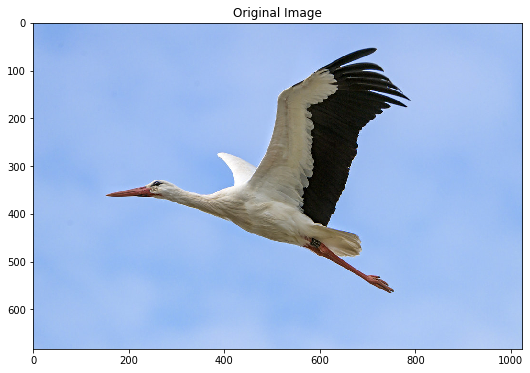

In [3]:
plt.figure(figsize=(12, 6))

plt.imshow(img_stork)
plt.title('Original Image')
plt.show()

In [4]:
img_stork.format, img_stork.mode, img_stork.size

('JPEG', 'RGB', (1024, 683))

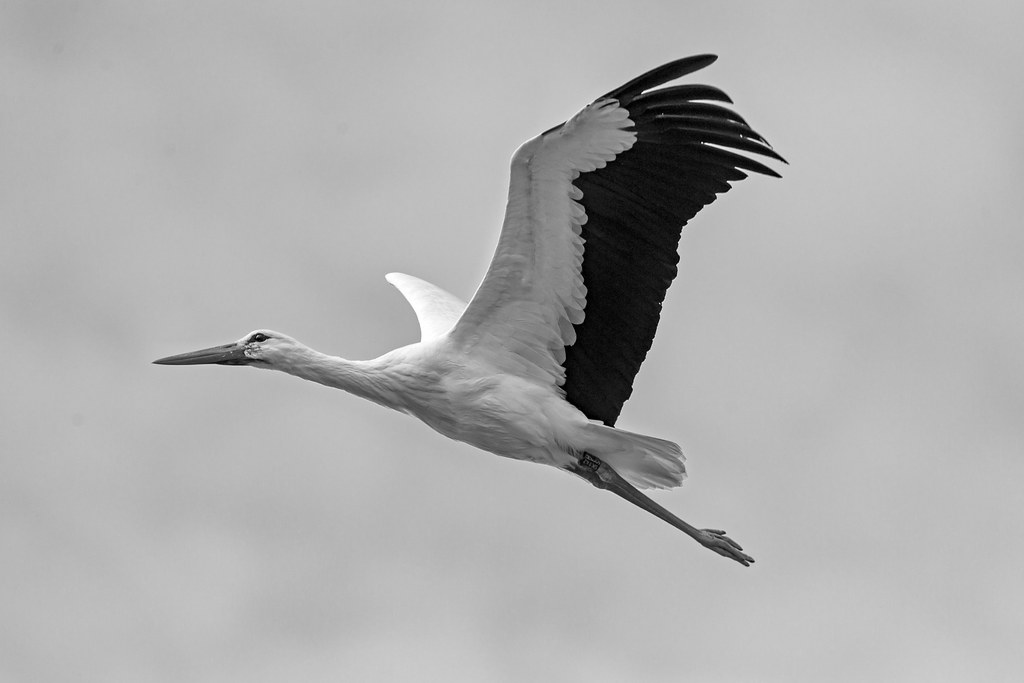

In [5]:
gs_image = img_stork.convert(mode='L')

gs_image

In [6]:
gs_image.size

(1024, 683)

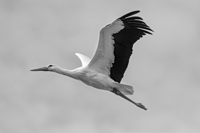

In [7]:
gs_image.thumbnail((200, 200))

gs_image

In [8]:
gs_image.size, img_stork.size

((200, 133), (1024, 683))

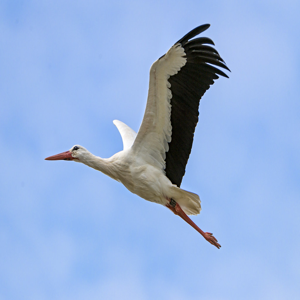

In [9]:
img_resize = img_stork.resize((300, 300))

img_resize

In [10]:
img_resize.size

(300, 300)

In [11]:
hoz_flip = img_stork.transpose(Image.FLIP_LEFT_RIGHT)
ver_flip = img_stork.transpose(Image.FLIP_TOP_BOTTOM)

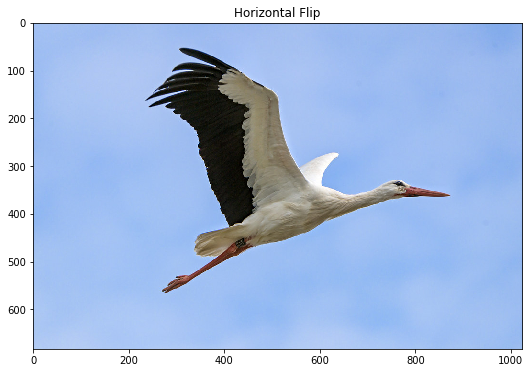

In [12]:
plt.figure(figsize=(12, 6))
plt.title('Horizontal Flip')
plt.imshow(hoz_flip)

plt.show()

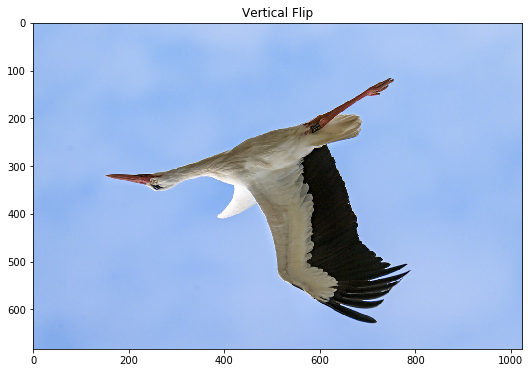

In [13]:
plt.figure(figsize=(12, 6))
plt.title('Vertical Flip')
plt.imshow(ver_flip)

plt.show()

In [14]:
img_stork_arr = np.array(img_stork)

type(img_stork_arr)

numpy.ndarray

In [15]:
img_stork_arr.shape

(683, 1024, 3)

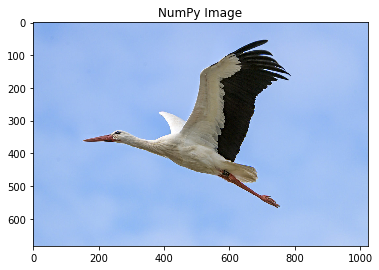

In [16]:
plt.figure(figsize=(6, 6))
plt.title('NumPy Image')
plt.imshow(img_stork_arr, cmap= 'gray')

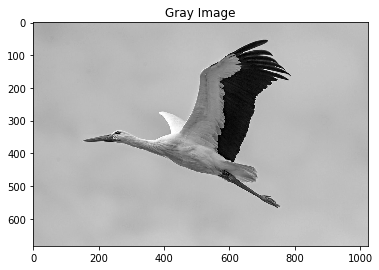

In [17]:
from skimage.color import rgb2gray

img_stork_arr_gray = rgb2gray(img_stork_arr)

plt.figure(figsize=(6, 6))
plt.title('Gray Image')
plt.imshow(img_stork_arr_gray, cmap='gray')

In [18]:
img_stork_arr_gray.shape

(683, 1024)

In [19]:
from skimage.transform import resize

stork_resized = resize(img_stork_arr, (224, 224), anti_aliasing=True)

stork_resized.shape

(224, 224, 3)

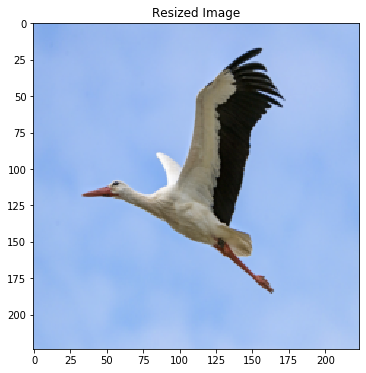

In [20]:
plt.figure(figsize=(6, 6))
plt.title('Resized Image')
plt.imshow(stork_resized)

In [21]:
img_stork_arr.shape

(683, 1024, 3)

In [22]:
# first dimension : (800-64+1) * (1200-64+1) = 837969
# sliding a 64 x 64 window across the image
patches = image.extract_patches_2d(img_stork_arr, (64, 64))

patches.shape

(595820, 64, 64, 3)

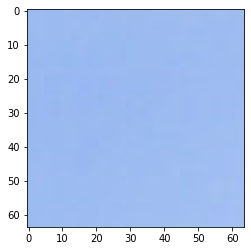

In [23]:
plt.imshow(patches[7090])
plt.show()

In [24]:
from skimage import data, io, filters

In [25]:
image = data.coins()
print(image)

[[ 47 123 133 ...  14   3  12]
 [ 93 144 145 ...  12   7   7]
 [126 147 143 ...   2  13   3]
 ...
 [ 81  79  74 ...   6   4   7]
 [ 88  82  74 ...   5   7   8]
 [ 91  79  68 ...   4  10   7]]


In [26]:
image.shape

(303, 384)

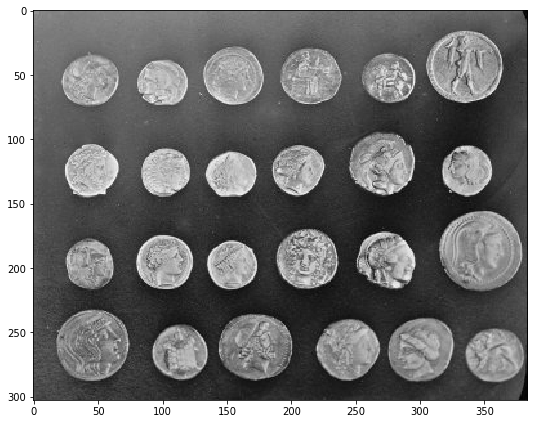

In [27]:
plt.figure(figsize=(12, 6))
io.imshow(image)

plt.show()

In [28]:
edges = filters.sobel(image)

print(edges)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.17208326 0.04307036 ... 0.03683979 0.00765711 0.        ]
 [0.         0.06139791 0.02499519 ... 0.084638   0.00490196 0.        ]
 ...
 [0.         0.03114192 0.02949335 ... 0.01669548 0.00588235 0.        ]
 [0.         0.04030354 0.0335059  ... 0.00571662 0.00980392 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


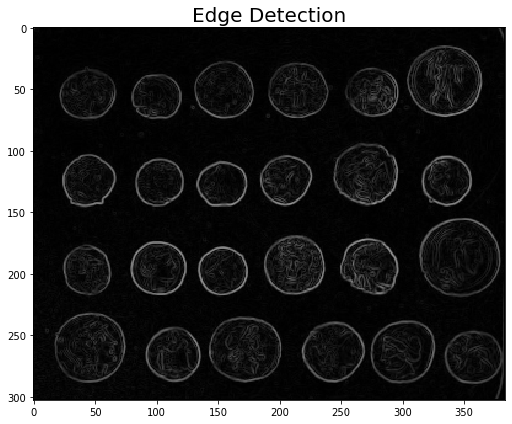

In [29]:
plt.figure(figsize=(12, 6))
plt.title('Edge Detection', fontsize=20)
io.imshow(edges)

plt.show()

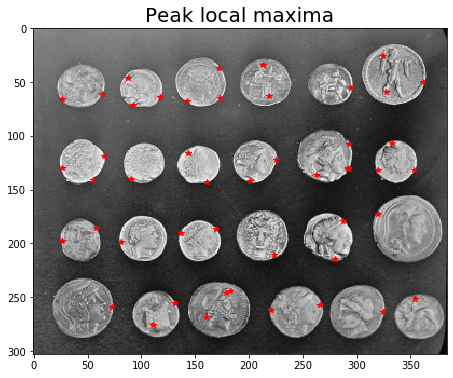

In [30]:
# Local maximas
from skimage.feature import peak_local_max

coordinates = peak_local_max(image, min_distance=20)

fig, axes = plt.subplots(figsize=(12, 6))
axes.imshow(image, cmap=plt.cm.gray)

axes.plot(coordinates[:, 1], coordinates[:, 0], 'r*')
axes.set_title('Peak local maxima', fontsize=20)

plt.show()

In [31]:
pisa1 = cv2.imread('/home/erich/Downloads/datasets/pisa1.jpg')
pisa1.shape

(500, 750, 3)

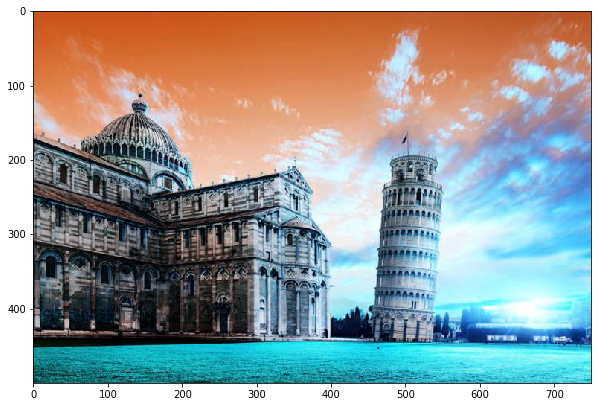

In [32]:
plt.figure(figsize=(10, 10))
plt.imshow(pisa1)

In [33]:
gray1 = cv2.cvtColor(pisa1, cv2.COLOR_BGR2GRAY)

In [34]:
# SIFT: (Scale Invariant Feature Transform) used to detect and
# extract features in underlying image
sift = cv2.xfeatures2d.SIFT_create()

#sift

<xfeatures2d_SIFT 0x7fbe05900d70>

In [35]:
keypoints1 = sift.detect(gray1, None)

#keypoints1

[<KeyPoint 0x7fbe057dfc30>,
 <KeyPoint 0x7fbfba9e4390>,
 <KeyPoint 0x7fbfba9e4db0>,
 <KeyPoint 0x7fbfba9e4240>,
 <KeyPoint 0x7fbfba9e4de0>,
 <KeyPoint 0x7fbfba9e4600>,
 <KeyPoint 0x7fbfba9e4f00>,
 <KeyPoint 0x7fbfba9e4990>,
 <KeyPoint 0x7fbfba9e4660>,
 <KeyPoint 0x7fbfba9e44b0>,
 <KeyPoint 0x7fbfba9e4570>,
 <KeyPoint 0x7fbfba9e4930>,
 <KeyPoint 0x7fbfba9e4780>,
 <KeyPoint 0x7fbfba9e4300>,
 <KeyPoint 0x7fbfba9e4210>,
 <KeyPoint 0x7fbfba9e4810>,
 <KeyPoint 0x7fbfba9e4a50>,
 <KeyPoint 0x7fbfba9e4ae0>,
 <KeyPoint 0x7fbfba9e4510>,
 <KeyPoint 0x7fbfba9e49f0>,
 <KeyPoint 0x7fbfba9e4c90>,
 <KeyPoint 0x7fbfba9e4cc0>,
 <KeyPoint 0x7fbfba9e41e0>,
 <KeyPoint 0x7fbfba9e40c0>,
 <KeyPoint 0x7fbfba9e45a0>,
 <KeyPoint 0x7fbfba9e4ed0>,
 <KeyPoint 0x7fbfba9e47b0>,
 <KeyPoint 0x7fbfba9e4180>,
 <KeyPoint 0x7fbfba9e4a80>,
 <KeyPoint 0x7fbfba9e4630>,
 <KeyPoint 0x7fbfba9e4d20>,
 <KeyPoint 0x7fbfba9e4750>,
 <KeyPoint 0x7fbfba9e4270>,
 <KeyPoint 0x7fbfba9b60f0>,
 <KeyPoint 0x7fbfba9b6390>,
 <KeyPoint 0x7fbfba9

In [36]:
pisa1 = cv2.drawKeypoints(gray1, keypoints1, outImage=None)

cv2.imwrite('sift_pisa_keypoints.jpg', pisa1)

True

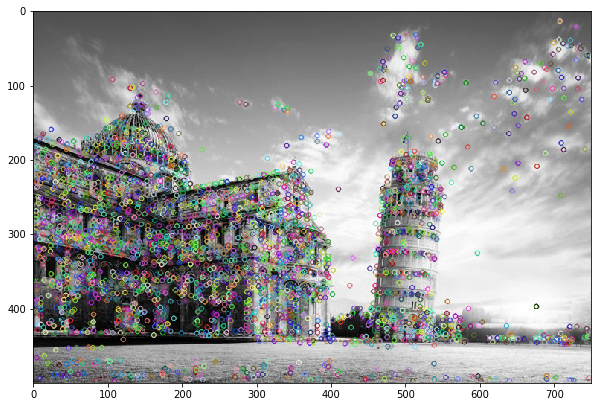

In [38]:
sift_pisa_keypoints = skimage.io.imread('sift_pisa_keypoints.jpg')

plt.figure(figsize=(10, 10))
plt.imshow(sift_pisa_keypoints, cmap='gray')